# **국가별 국방비 예측 모델**


---


---


#*1.   데이터 선정 이유 및 문제 정의*
  *   선정 이유 : 우크라이나와 러시아의 전쟁을 보며 내가 누리고있는 안전은 언제든지 없어질수 있다고 느꼈다. 나라별로 국가를 지키기위해 국방비에 투자하는 규모가 궁금해져서 데이터를 선정하게 되었다.

  * 군사비의 규모를 예측하기 위해 회귀 문제로 접근하고자 함.

#*2. 데이터를 이용한 가설 및 평가지표, 베이스라인 선택*  
-가설: gdp대비 국방비 비율과 국가지출 대비 국방비 비율이 국방비의 규모에 크게 영향을 미치고 있다.

-예측하고자 하는 변수

- target : 국방비

- 그 이유 : 국방비를 보면 그 군대의 규모를 알 수 있어서.

-베이스라인 모델

- 선형회귀를 사용할것이다.

- 이유 : 국방비의 규모를 알고 싶은거라 회귀가 맞다고 생각했다.


-평가지표 선택

- 회귀 평가지표(evaluation metrics): MAE,MSE,RMSE,R^2


#*3. EDA와 데이터 전처리*

- 종속변수 : M_USD

- 독립변수 : M_of_gov,M_of_GDP

- 전처리 : 결츨값 처리,불필요한 컬럼 처리


#4.머신러닝 방식 적용 및 교차검증

-  결정트리,부스팅(XGBRegressor)으로 모델을 학습함.

- 교차검증 

- Hyperparameter tuning



---


---













# EDA 와 데이터 전처리


---



In [1]:
!pip install category_encoders
!pip install pandas-profiling==2.11.0 --upgrade
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install eli5
!pip install pdpbox
!pip install shap
!pip install --upgrade scikit-learn
!pip install statsmodels
!conda install python-graphviz
!pip install pydotplus
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 243 kB 5.4 MB/s 
     |████████████████████████████████| 4.7 MB 51.4 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 690 kB 42.0 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 812 kB 36.0 MB/s 
     |████████████████████████████████| 1.6 MB 41.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=c52c2a0a2abc8fcc0dfb88369da07dace732aebf44bcd36b89c6c291489d9ecb
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from google.colab import files
import numpy as np
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
upload = files.upload()

Saving military expenditure.csv to military expenditure.csv


In [4]:
df = pd.read_csv('military expenditure.csv')
df.head()


,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,2.939586e+06,NaN,1.629606,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,3.341272e+06,NaN,1.868910,South Asia,Low income
4,Afghanistan,AFG,AF,1974,3.581366e+06,NaN,1.610825,South Asia,Low income


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13566 entries, 0 to 13565
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     13566 non-null  object 
 1   iso3c                                                       13464 non-null  object 
 2   iso2c                                                       13413 non-null  object 
 3   year                                                        13566 non-null  int64  
 4   Military expenditure (current USD)                          8769 non-null   float64
 5   Military expenditure (% of general government expenditure)  5282 non-null   float64
 6   Military expenditure (% of GDP)                             8777 non-null   float64
 7   adminregion                                                 6987 non-null   object 
 8

In [6]:
df.columns = ['country', 'iso3c', 'iso2c', 'year','M_USD','M_of_gov','M_of_GDP', 'adminregion', 'incomeLevel']
df.head()

,country,iso3c,iso2c,year,M_USD,M_of_gov,M_of_GDP,adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,2.939586e+06,NaN,1.629606,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,3.341272e+06,NaN,1.868910,South Asia,Low income
4,Afghanistan,AFG,AF,1974,3.581366e+06,NaN,1.610825,South Asia,Low income


In [7]:
df1 = df[df['year'] > 1999]
df1 = df1.drop(['iso2c'],axis=1)
values = {'M_USD':0,'M_of_gov':0,'M_of_GDP':0}
df1 = df1.fillna(value=values)
pd.options.display.float_format = '{:.2f}'.format
df1 = df1.astype({'M_USD':'int64'})
df1.head(100)

,country,iso3c,year,M_USD,M_of_gov,M_of_GDP,adminregion,incomeLevel
30,Afghanistan,AFG,2000,0,0.00,0.00,South Asia,Low income
31,Afghanistan,AFG,2001,0,0.00,0.00,South Asia,Low income
32,Afghanistan,AFG,2002,0,0.00,0.00,South Asia,Low income
33,Afghanistan,AFG,2003,0,0.00,0.00,South Asia,Low income
34,Afghanistan,AFG,2004,125111557,16.13,2.43,South Asia,Low income
...,...,...,...,...,...,...,...,...
245,Algeria,DZA,2011,8652237040,10.78,4.33,Middle East & North Africa (excluding high inc...,Lower middle income
246,Algeria,DZA,2012,9326287144,10.25,4.46,Middle East & North Africa (excluding high inc...,Lower middle income
247,Algeria,DZA,2013,10161588239,13.39,4.84,Middle East & North Africa (excluding high inc...,Lower middle income
248,Algeria,DZA,2014,9724379971,13.66,5.55,Middle East & North Africa (excluding high inc...,Lower middle income


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5586 entries, 30 to 13565
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5586 non-null   object 
 1   iso3c        5544 non-null   object 
 2   year         5586 non-null   int64  
 3   M_USD        5586 non-null   int64  
 4   M_of_gov     5586 non-null   float64
 5   M_of_GDP     5586 non-null   float64
 6   adminregion  2877 non-null   object 
 7   incomeLevel  5544 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 392.8+ KB


In [9]:
idx = df1[df1['incomeLevel']=='Aggregates'].index
idx3 = df1[df1['incomeLevel']=='Not classified'].index
df1 = df1.drop(idx)
df1 = df1.drop(idx3)

In [10]:
df1

,country,iso3c,year,M_USD,M_of_gov,M_of_GDP,adminregion,incomeLevel
30,Afghanistan,AFG,2000,0,0.00,0.00,South Asia,Low income
31,Afghanistan,AFG,2001,0,0.00,0.00,South Asia,Low income
32,Afghanistan,AFG,2002,0,0.00,0.00,South Asia,Low income
33,Afghanistan,AFG,2003,0,0.00,0.00,South Asia,Low income
34,Afghanistan,AFG,2004,125111557,16.13,2.43,South Asia,Low income
...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,2016,358065000,7.36,1.74,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,2017,340522000,5.52,1.54,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,2018,420364000,5.61,1.22,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,2019,546939000,2.10,0.70,Sub-Saharan Africa (excluding high income),Lower middle income


In [11]:
df1 = df1[pd.notnull(df1['incomeLevel'])]
df1.reset_index(drop=True)

,country,iso3c,year,M_USD,M_of_gov,M_of_GDP,adminregion,incomeLevel
0,Afghanistan,AFG,2000,0,0.00,0.00,South Asia,Low income
1,Afghanistan,AFG,2001,0,0.00,0.00,South Asia,Low income
2,Afghanistan,AFG,2002,0,0.00,0.00,South Asia,Low income
3,Afghanistan,AFG,2003,0,0.00,0.00,South Asia,Low income
4,Afghanistan,AFG,2004,125111557,16.13,2.43,South Asia,Low income
...,...,...,...,...,...,...,...,...
4531,Zimbabwe,ZWE,2016,358065000,7.36,1.74,Sub-Saharan Africa (excluding high income),Lower middle income
4532,Zimbabwe,ZWE,2017,340522000,5.52,1.54,Sub-Saharan Africa (excluding high income),Lower middle income
4533,Zimbabwe,ZWE,2018,420364000,5.61,1.22,Sub-Saharan Africa (excluding high income),Lower middle income
4534,Zimbabwe,ZWE,2019,546939000,2.10,0.70,Sub-Saharan Africa (excluding high income),Lower middle income


In [12]:
df1['incomeLevel'].value_counts()

High income            1659
Upper middle income    1155
Lower middle income    1155
Low income              567
Name: incomeLevel, dtype: int64


> 기준모델인 평균과 데이터 분포를 그래프로 표현



예측한 국방비가 $36,760,653,639이며 절대평균에러가 $57,666,649,885임을 확인할 수 있습니다.


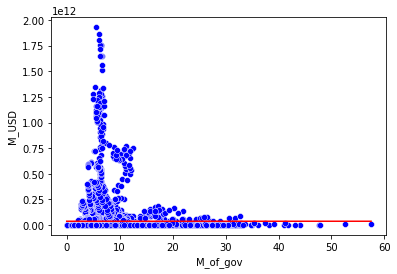

In [13]:
x = df['M_of_gov']
y = df['M_USD']

predict = df['M_USD'].mean()
errors = predict - df['M_USD']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');
print(f'예측한 국방비가 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

> 특성들의 상관관계를 그래프로 표현



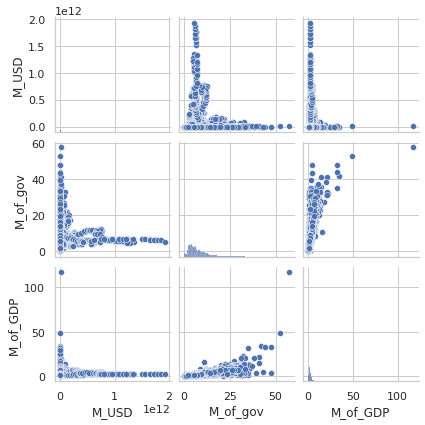

In [14]:
sns.set(style='whitegrid', context='notebook')
cols = ['M_USD', 'M_of_gov','M_of_GDP']
sns.pairplot(df[cols], height=2);

> M_of_GPD 회귀선을 그래프로 표현








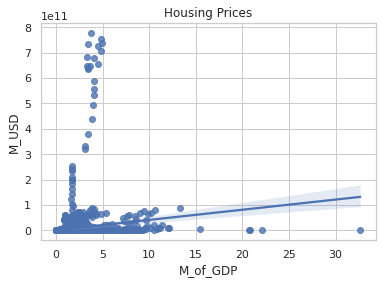

In [15]:
sns.regplot(x=df1['M_of_GDP'], y=df1['M_USD']).set_title('Housing Prices');

> M_of_gov 회귀선을 그래프로 표현








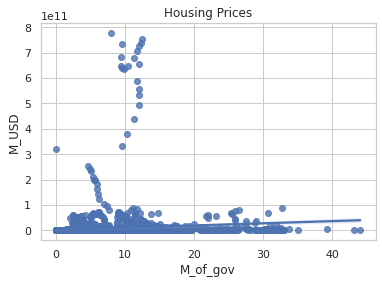

In [16]:
sns.regplot(x=df1['M_of_gov'], y=df1['M_USD']).set_title('Housing Prices');



> 나라별 M_USD 평균을 확인


In [17]:
df2 = df1.groupby('country').mean()
df2.head()

,year,M_USD,M_of_gov,M_of_GDP
country,,,,
Afghanistan,2010.00,177115099.33,6.08,1.29
Albania,2010.00,149792925.19,3.65,1.41
Algeria,2010.00,6444481720.62,11.93,4.39
American Samoa,2010.00,0.00,0.00,0.00
Andorra,2010.00,0.00,0.00,0.00




> 나라별 국방비 평균및 회귀선을 그래프로 표현



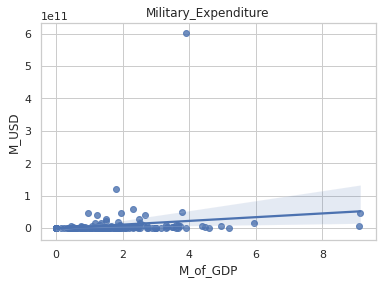

In [18]:
sns.regplot(x=df2['M_of_GDP'], y=df2['M_USD']).set_title('Military_Expenditure');

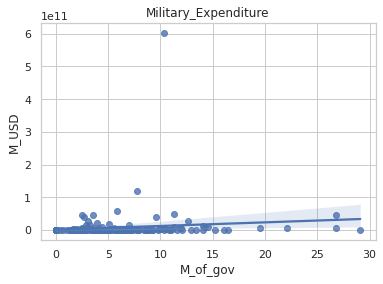

In [19]:
sns.regplot(x=df2['M_of_gov'], y=df2['M_USD']).set_title('Military_Expenditure');



> 나라별 국방비 평균 랭킹을 구함



In [20]:
df2['M_rank'] = df2['M_USD'].rank(ascending=False)
df2['M_rank'] = df2['M_rank'].astype(int)
df2 = df2.sort_values('M_rank',ascending = True)
df2.head(10)


,year,M_USD,M_of_gov,M_of_GDP,M_rank
country,,,,,
United States,2010.00,603128868013.38,10.33,3.89,1
China,2010.00,120702748325.10,7.77,1.80,2
United Kingdom,2010.00,58833376412.29,5.83,2.32,3
Russian Federation,2010.00,50498560472.71,11.30,3.78,4
Japan,2010.00,46968274421.62,2.53,0.95,5
Saudi Arabia,2010.00,46778381727.57,26.77,9.13,6
France,2010.00,46702860472.52,3.56,1.96,7
India,2010.00,40551400931.05,9.57,2.69,8
Germany,2010.00,39712814613.05,2.67,1.23,9




> 나라별 국방비 랭킹을 그래프로 표현 -> 미국의 국방비 규모는 월등히 크다


([<matplotlib.patches.Wedge at 0x7f8574995310>,
 [Text(-1.0824228146537862, -0.19585926150421284, '1'),
  Text(0.7155152520044405, -0.835486639120592, '2'),
  Text(1.0363965353368931, -0.36862205786100793, '3'),
  Text(1.099669127573503, -0.026977951399810525, '4'),
  Text(1.0635238901288129, 0.28092158180758714, '5'),
  Text(0.9489637459173728, 0.5562983093039815, '6'),
  Text(0.7652466964223057, 0.7901882646652933, '7'),
  Text(0.5429571248661127, 0.9566595844693788, '8'),
  Text(0.30753925190032105, 1.0561342758099423, '9'),
  Text(0.09236948850310941, 1.0961149016383611, '10')],
 [Text(-0.5904124443566106, -0.10683232445684336, '55.7%'),
  Text(0.3902810465478766, -0.45571998497486826, '11.1%'),
  Text(0.5653072010928507, -0.2010665770150952, '5.4%'),
  Text(0.5998195241310017, -0.014715246218078466, '4.7%'),
  Text(0.5801039400702614, 0.1532299537132293, '4.3%'),
  Text(0.5176165886822033, 0.3034354414385353, '4.3%'),
  Text(0.41740728895762125, 0.4310117807265236, '4.3%'),
  Text

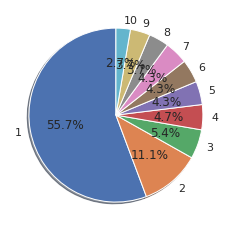

In [21]:
df2 = df2.head(10)
fig1, ax1 = plt.subplots()
ax1.pie(df2['M_USD'], labels=df2['M_rank'], autopct='%0.1f%%',shadow=True, startangle=90)



---

# 머신러닝 방식 적용 및 교차검증


---




# 1)선형회귀






> M_of_gov와 M_USD 선형회귀



In [22]:
target = ['M_USD']
features_gov = ['M_of_gov']
train, test = train_test_split(df1, test_size=0.2, random_state=2)
print(train.shape, test.shape)

(3628, 8) (908, 8)


In [23]:
#예측모델 인스턴스 생성
model1 = LinearRegression()

#X 특성의 테이블과 y 타겟 벡터 만들기
X_train_gov=train[features_gov]
y_train_gov=train[target]
X_test_gov=test[features_gov]
y_test_gov=test[target]

In [37]:
#모델 학습: fit()메소드 사용해 모델 학습
model1.fit(X_train_gov,y_train_gov)
y_pred_gov = model1.predict(X_train_gov)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
MAE=mean_absolute_error(y_train_gov, y_pred_gov)
MSE=mean_squared_error(y_train_gov,y_pred_gov)
RMSE=np.sqrt(MSE)
R2= r2_score(y_train_gov, y_pred_gov)
print("MAE :",MAE,"MSE :", MSE,"RMSE :", RMSE,"R^2 :",R2)

MAE : 10402899102.431288 MSE : 2.0372328443144765e+21 RMSE : 45135715839.171936 R^2 : 0.012574960107511912


In [ ]:
#결정계수 R²의 최댓값은 1이며 이 수치가 클수록 실제값과 예측값이 유사함을 의미
#모델링한 다중회귀모델은 약 0.012의 결정계수를 가지며 이는 독립변수들이 종속변수에 미치는 영향이 1.2%로, 독립변수들이 국방비 수치 변동의 1.2%를 설명할 수 있다는 뜻!



> M_of_gov와 M_USD 회귀계수



In [25]:
model1.coef_

array([[8.94767221e+08]])

In [26]:
model1.intercept_

array([2.58566882e+09])


> M_of_GDP와 M_USD 선형회귀




In [27]:
target = ['M_USD']
features_GDP = ['M_of_GDP']
train, test = train_test_split(df1, test_size=0.2, random_state=2)
print(train.shape, test.shape)

(3628, 8) (908, 8)


In [28]:
model2 = LinearRegression()

X_train_GDP=train[features_GDP]
y_train_GDP=train[target]
X_test_GDP=test[features_GDP]
y_test_GDP=test[target]

In [38]:
#모델 학습: fit()메소드 사용해 모델 학습
model2.fit(X_train_GDP ,y_train_GDP )
y_pred_GDP  = model2.predict(X_train_GDP )

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
MAE=mean_absolute_error(y_train_GDP, y_pred_GDP)
MSE=mean_squared_error(y_train_GDP,y_pred_GDP)
RMSE=np.sqrt(MSE)
R2= r2_score(y_train_GDP, y_pred_GDP)
print("MAE :",MAE,"MSE :", MSE,"RMSE :", RMSE,"R^2 :",R2)

MAE : 10053753953.484344 MSE : 2.011240980791102e+21 RMSE : 44846861437.46407 R^2 : 0.02517293924773356


In [ ]:
#결정계수 R²의 최댓값은 1이며 이 수치가 클수록 실제값과 예측값이 유사함을 의미
#모델링한 다중회귀모델은 약 0.025의 결정계수를 가지며 이는 독립변수들이 종속변수에 미치는 영향이 2.5%로, 독립변수들이 국방비 수치 변동의 2.5%를 설명할 수 있다는 뜻!

> M_of_GDP와 M_USD 회귀계수

In [30]:
model2.coef_

array([[4.17972147e+09]])

In [31]:
model2.intercept_

array([1.1033525e+09])

# 2)다중선형회귀





In [32]:
from sklearn.linear_model import LinearRegression

target = 'M_USD'
features = ['M_of_gov','M_of_GDP']
train, test = train_test_split(df1, test_size=0.2, random_state=2)
print(train.shape, test.shape)

(3628, 8) (908, 8)


In [33]:
X_train=train[features]
y_train=train[target]
X_test=test[features]
y_test=test[target] 

In [34]:
from category_encoders import TargetEncoder

linear = make_pipeline(
    TargetEncoder(),  
    LinearRegression()
)

linear.fit(X_train, y_train)
print('R^2', linear.score(X_train, y_train))

R^2 0.025941858164886034




> 다중선형회귀의 회귀계수



In [35]:
# 회귀계수
coefficients = linear.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

M_of_gov   -376777259.20
M_of_GDP   5186607072.37
dtype: float64

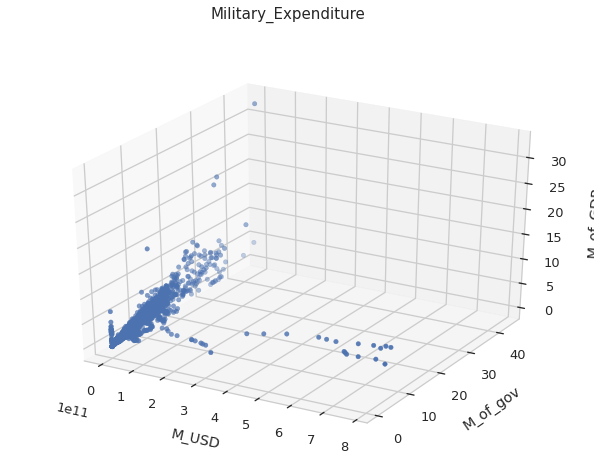

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

ax = fig.gca(projection='3d')

ax.scatter(train['M_USD'], train['M_of_gov'], train['M_of_GDP'])
ax.set_xlabel('M_USD', labelpad=20)
ax.set_ylabel('M_of_gov', labelpad=20)
ax.set_zlabel('M_of_GDP', labelpad=20)

plt.suptitle('Military_Expenditure', fontsize=15)
plt.show()


In [120]:
linear = LinearRegression()
linear.fit(X_train, y_train)
print('R2: ', linear.score(X_train, y_train))
print('Intercept: ', linear.intercept_[0])
print('Coefficients')
pd.DataFrame(columns=cols[:2], data=linear.coef_)

R2:  0.025941858164886034
Intercept:  1515915095.4151993
Coefficients


,M_USD,M_of_gov
0,-376777259.20,5186607072.37


#3) 결정트리



In [59]:
from ipywidgets import interact
from sklearn.tree import DecisionTreeRegressor, export_graphviz


target = ['M_USD']
features = ['M_of_gov','M_of_GDP']
train, test = train_test_split(df1, test_size=0.2, random_state=2)
print(train.shape, test.shape)

(3628, 8) (908, 8)


In [78]:
X_train=train[features]
y_train=train[target]
X_test=test[features]
y_test=test[target]

In [150]:
from sklearn.tree import DecisionTreeRegressor
pipe = make_pipeline(DecisionTreeRegressor(min_samples_leaf=54, random_state=10))
pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

훈련 정확도:  0.14580786547071256
테스트 정확도:  0.11429540876904143




> 특성중요도


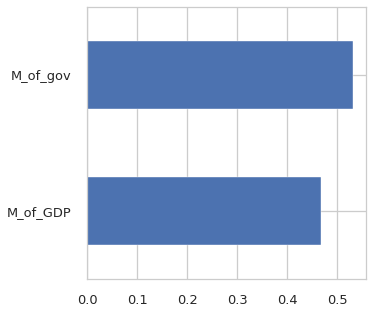

In [115]:
#특성중요도
model_dt = pipe.named_steps['decisiontreeregressor']
encoded_columns = X_train.columns

#model_dt.feature_importances_ :변수별 중요도 추출
importances = pd.Series(model_dt.feature_importances_,encoded_columns)# 변수별 중요도 추출하여서

plt.figure(figsize=(5,5))
importances.sort_values().plot.barh();

#4) 랜덤포레스트

In [162]:
target = ['M_USD']
features = ['M_of_gov','M_of_GDP']
train, test = train_test_split(df1, test_size=0.2, random_state=2)
print(train.shape, test.shape)

(3628, 8) (908, 8)


In [163]:
X_train=train[features]
y_train=train[target]
X_test=test[features]
y_test=test[target]

In [169]:
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(RandomForestRegressor(min_samples_leaf=54, random_state=10))
pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


훈련 정확도:  0.12921626223184268
테스트 정확도:  0.10846905311647859


#5) 하이퍼파라미터 튜닝



> GridSearchCV 학습



In [47]:
target = ['M_USD']
features = ['M_of_gov','M_of_GDP']

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [179]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# GridSearchCV의 param_grid 설정
params = {
    'max_depth': [2, 3],
    'min_samples_split': [2, 3]
}

dtc = DecisionTreeRegressor()

grid_tree = GridSearchCV(dtc, param_grid=params, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
em = grid_tree.best_estimator_
pred = em.predict(X_test)
r2_score(y_test, pred)

best parameters :  {'max_depth': 2, 'min_samples_split': 2}
best score :  0.08035633219499612


0.08448189345053425



> XGBRegressor 학습



In [176]:
from xgboost import XGBRegressor
boosting = XGBRegressor(objective='reg:squarederror',n_estimators=50, learning_rate=0.2, max_depth=3)
boosting.fit(X_train, y_train)
print(boosting.score(X_train,y_train))

0.7528888467621526


In [177]:
#하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [50, 100, 200],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_
  
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 50,
 'objective': 'reg:squarederror'}

In [180]:
#하이퍼파라미터 튜닝 후 모델
from xgboost import XGBRegressor
boosting = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=7,
    colsample_bytree=0.7)
boosting.fit(X_train, y_train)
print(boosting.score(X_train,y_train))

0.9822928299494501


In [181]:
#테스트 테이터 스코어
y_pred = boosting.predict(X_test)
MAE=mean_absolute_error(y_test, y_pred)
MSE=mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)
R2= r2_score(y_test, y_pred)
print(MAE, MSE, RMSE, R2)

11511621855.084803 3.17779356358649e+21 56371921765.95091 -1.3116378337319663




> 실제값과 예측값를 그래프로 표현



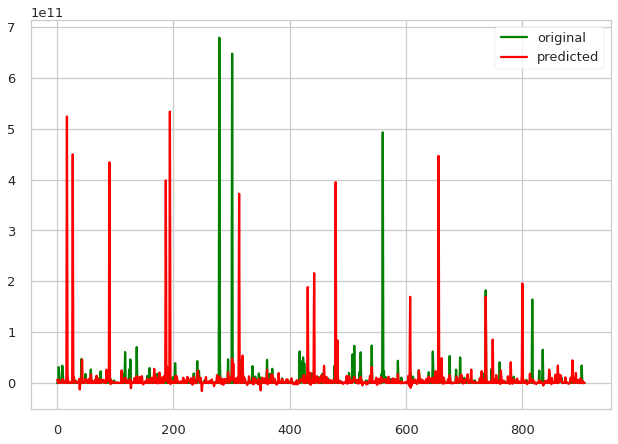

In [182]:
#시각화 
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original",color='Green')
plt.plot(x_ax, y_pred, label="predicted",color='red')
plt.legend()
plt.show()

#6) 머신러닝 모델 해석



> PDP



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


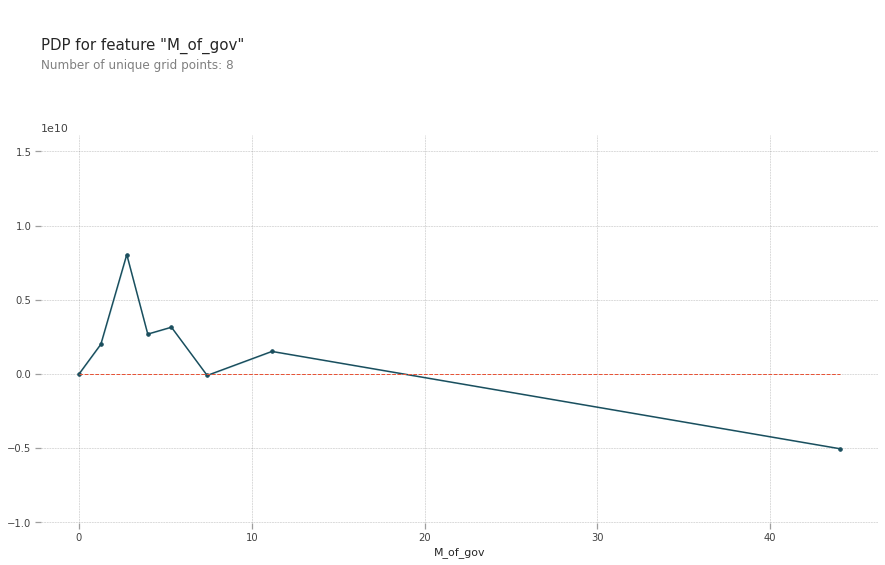

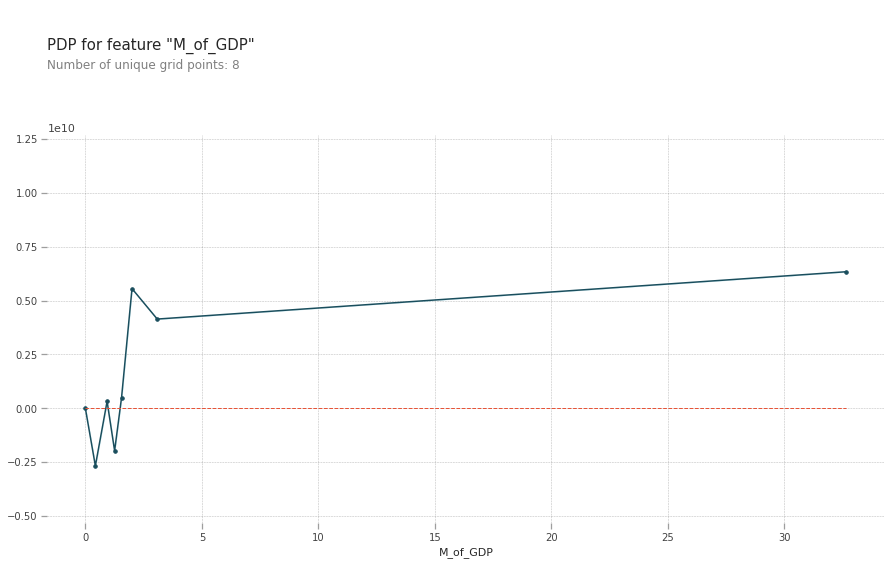

In [ ]:
#주요 특성에 대한 PDP plots 그리기
from pdpbox.pdp import pdp_isolate, pdp_plot
for i in ['M_of_gov','M_of_GDP']:
    feature = i
    
    isolated = pdp_isolate(
      model=boosting, 
      dataset=X_train, 
      model_features=X_train.columns, 
      feature=feature
)
    pdp_plot(isolated, feature_name=feature);
    plt.show();



> SHAP


In [ ]:
import shap
explainer = shap.TreeExplainer(model)
# 100개 테스트 샘플에 대해서 각 특성들의 영향을 봅니다. 샘플 수를 너무 크게 잢으면 계산이 오래걸리니 주의하세요.
shap_values = explainer.shap_values(X_test.iloc[:100])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:100])


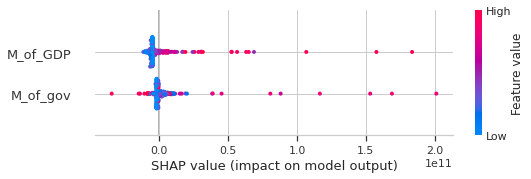

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values, X_test.iloc[:300])

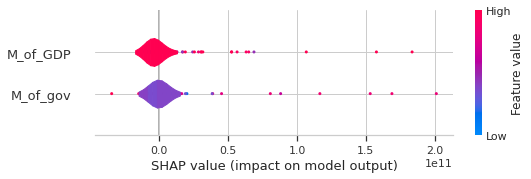

In [ ]:
shap.summary_plot(shap_values, X_test.iloc[:300], plot_type="violin")

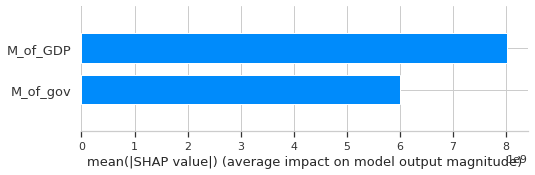

In [ ]:
shap.summary_plot(shap_values, X_test.iloc[:300], plot_type="bar")



---



---
# 종합 결론

귀무가설 'gdp대비 국방비 비율(M_of_GDP)과 국가지출 대비 국방비 비율(M_of_gov)로 국방비의 규모에 크게 영향을 미치고 있다.'이다.

gdp대비 국방비 비율(M_of_GDP)과 국가지출 대비 국방비 비율(M_of_gov)은  국방비에 영향을 주지 않는다.

비율이 아닌 GDP,국가지출의 데이터가 필요하다.

모델 성능이 매우 좋지 않다.


> ## *데이터가 부족했고 독립변수 설정과 가설에 문제가 있었던 거 같다.*
  







---



---





